In [36]:
#import libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

plt.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (12,8) 

df = pd.read_csv(r'D:\DA Portfolio Projects\Python Porfolio Dataset\movies.csv')


In [38]:
# Check the data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [46]:
# Check the info & datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [48]:
#Let's check it out if there is missing data

for col in df.columns:
   pct_missing = np.mean(df[col].isnull())
   print('{} - {}%'. format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [50]:
na_data = df[df['budget'].isna()]
na_data.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,NaN,21202829.0,Metro-Goldwyn-Mayer (MGM),134.0
19,Stir Crazy,R,Comedy,1980,"December 12, 1980 (United States)",6.8,26000.0,Sidney Poitier,Bruce Jay Friedman,Gene Wilder,United States,NaN,101300000.0,Columbia Pictures,111.0
24,Urban Cowboy,PG,Drama,1980,"June 6, 1980 (United States)",6.4,14000.0,James Bridges,Aaron Latham,John Travolta,United States,NaN,46918287.0,Paramount Pictures,132.0
25,Altered States,R,Horror,1980,"December 25, 1980 (United States)",6.9,33000.0,Ken Russell,Paddy Chayefsky,William Hurt,United States,NaN,19853892.0,Warner Bros.,102.0
26,Little Darlings,R,Comedy,1980,"March 21, 1980 (United States)",6.5,5100.0,Ron Maxwell,Kimi Peck,Tatum O'Neal,United States,NaN,34326249.0,Stephen Friedman/Kings Road Productions,96.0


In [52]:
# Fill missing values with 0 before conversion

df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

In [54]:
# Change data type 

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [56]:
df[df['name'] == 'Fame']

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
16,Fame,R,Drama,1980,"May 16, 1980 (United States)",6.6,21000.0,Alan Parker,Christopher Gore,Eddie Barth,United States,0,21202829,Metro-Goldwyn-Mayer (MGM),134.0
5591,Fame,PG,Comedy,2009,"September 25, 2009 (United States)",5.1,16000.0,Kevin Tancharoen,Allison Burnett,Kelsey Grammer,United States,18000000,77211836,Metro-Goldwyn-Mayer (MGM),107.0


In [58]:
# To create correct year column

df['yearcorrect'] = df['released'].astype(str).str.extract(pat = '([0-9]{4})')

In [60]:
# remove duplicate values and sort the data within in the company col 

df['company'].drop_duplicates().sort_values(ascending = False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
408                                     NaN
Name: company, Length: 2386, dtype: object

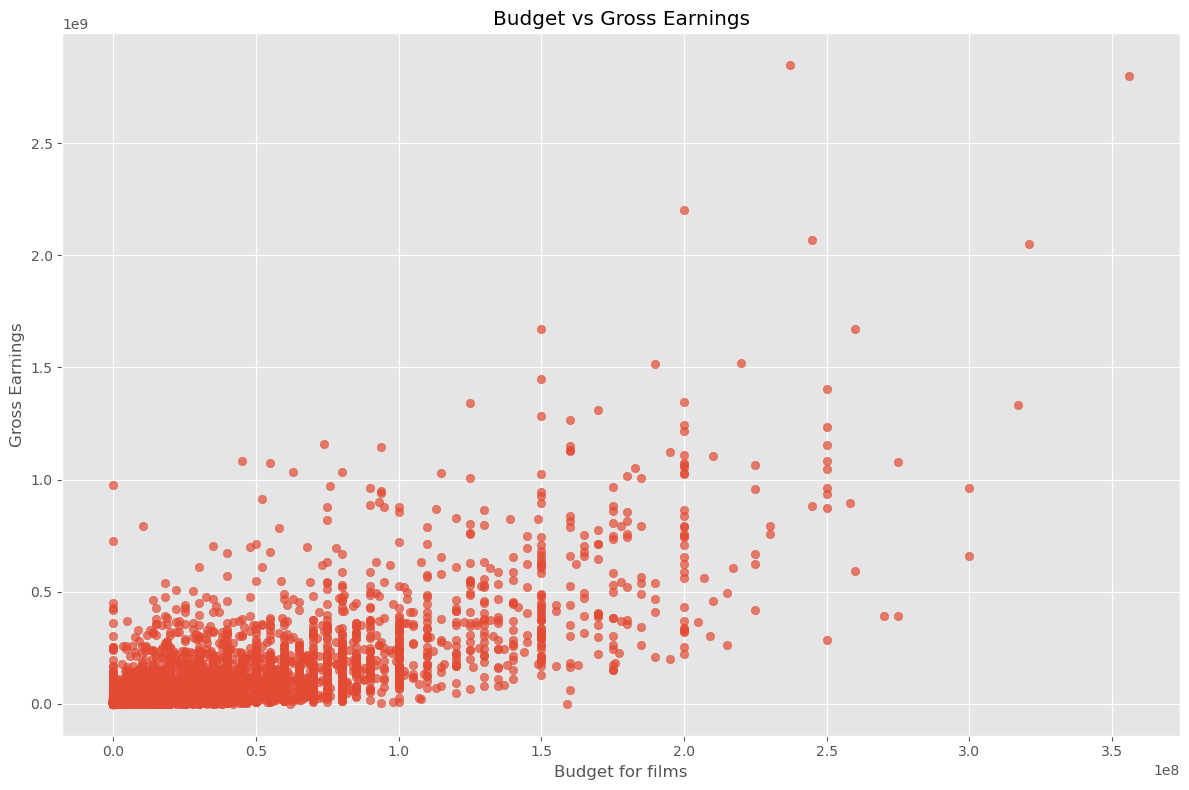

In [62]:
# Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'], alpha = 0.7) 
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for films')
plt.ylabel('Gross Earnings')
plt.grid(True)

# adjusts the plot's parameters to prevent labels and titles from overlapping
plt.tight_layout()

plt.show()

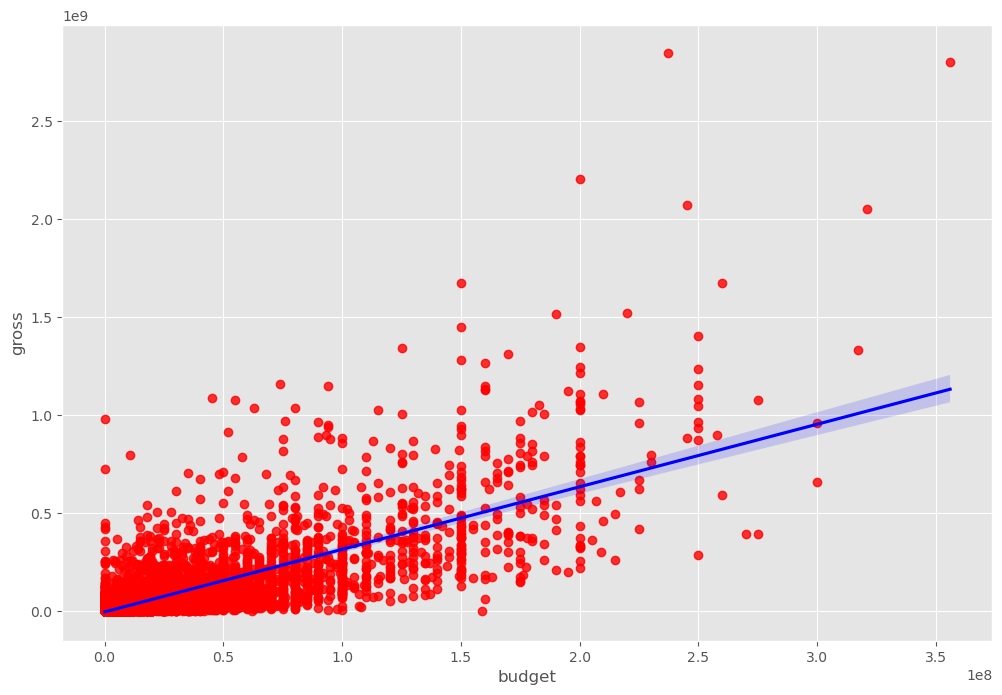

In [148]:
# Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data = df, scatter_kws = {"color" : "red"}, line_kws = {"color" : "blue"})
plt.show()

In [76]:
# sorting 

a = df['gross'].sort_values(ascending = False).head(10)
a

5445    2847246203
7445    2797501328
3045    2201647264
6663    2069521700
7244    2048359754
7480    1670727580
6653    1670516444
6043    1518815515
6646    1515341399
7494    1450026933
Name: gross, dtype: int64

In [78]:
a1 = df.sort_values(by = 'gross', inplace = False, ascending = False).head(10)
a1

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0,2012
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137.0,2015
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103.0,2019


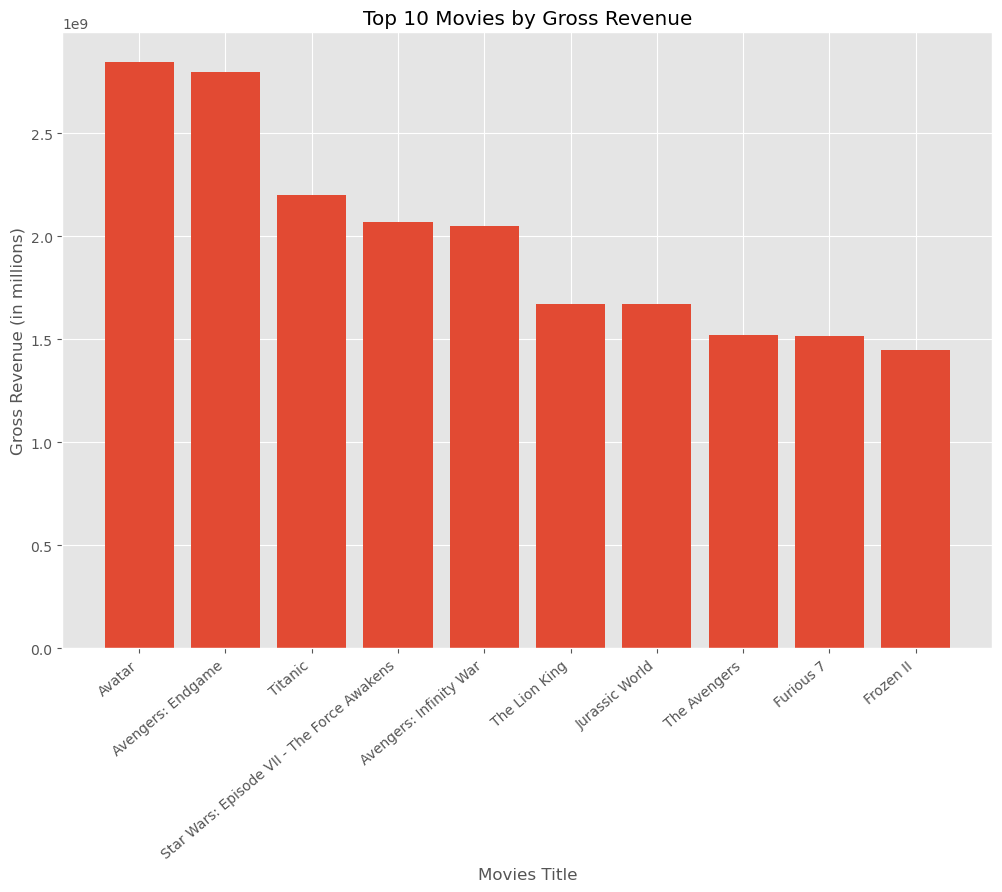

In [106]:
# Get the top 10 movies by gross revenue and Create a Bar Chart

top_10_movies = df.nlargest(10, 'gross')

plt.bar(top_10_movies['name'], top_10_movies['gross'])
plt.title("Top 10 Movies by Gross Revenue")
plt.xlabel("Movies Title")
plt.ylabel("Gross Revenue (in millions)")
plt.xticks(rotation = 40, ha = 'right')
plt.show()

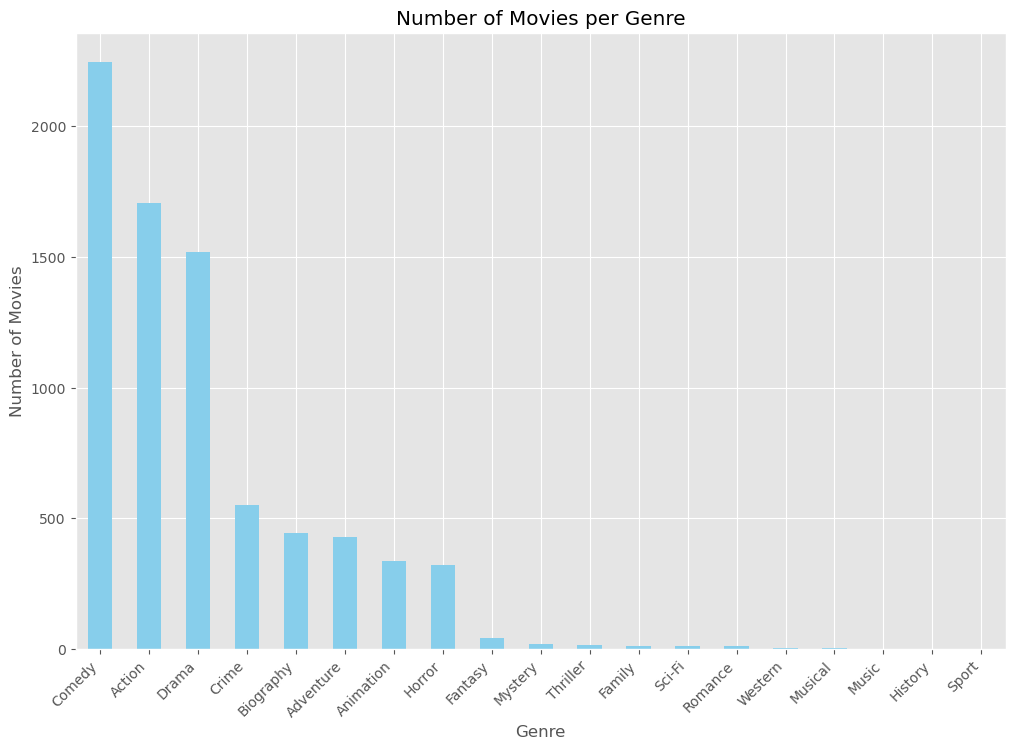

In [146]:
# Count the number of movies for each genre

genre_count = df['genre'].value_counts()

genre_count.plot(kind = 'bar', color='skyblue')
plt.title("Number of Movies per Genre")
plt.xlabel("Genre")
plt.ylabel("Number of Movies")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [142]:
# Let's start looking at correlation
#method = pearson, kendall, spearman

df.corr(numeric_only = 'True')

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


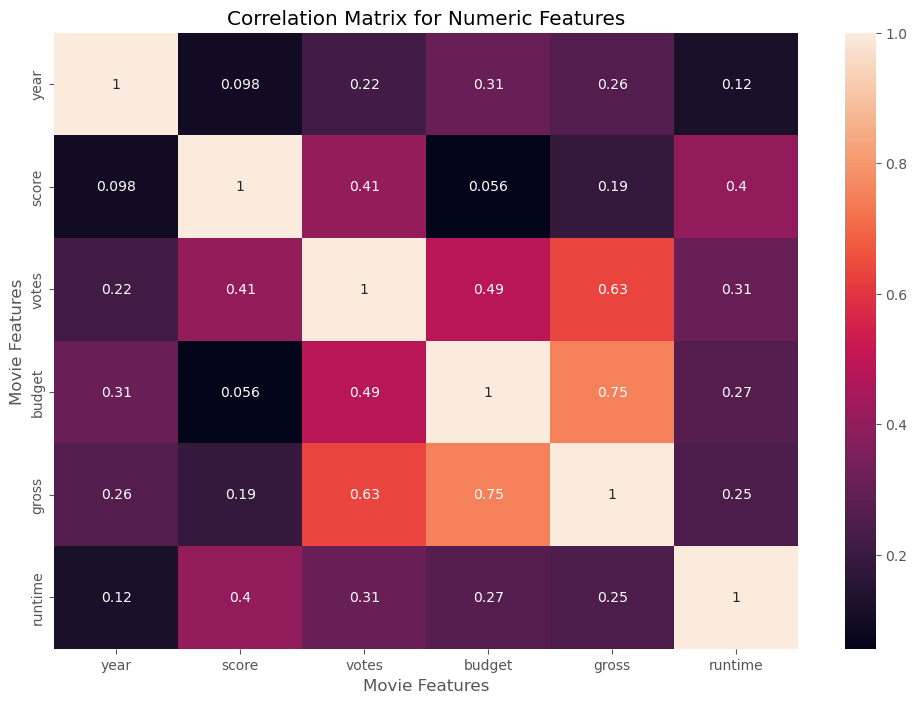

In [144]:
# high correlation between budget and gross

correlation_matrix = df.corr(numeric_only = 'True')

sns.heatmap(correlation_matrix, annot = True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()